    Beginning the Regression Preparation

In [2]:

import pandas as pd

Building a Random Forest Model

In [3]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV as GSCV
from sklearn.externals.joblib import dump,load
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [4]:
ML_dataset = pd.read_csv("data\ML_dataset.csv")

In [5]:
ML_dataset.head()

,specialty_description,nppes_provider_city,total_claim_count,total_drug_cost,total_day_supply,total_30_day_fill_count,bene_count,brand_percent_spending
0,39,9174,1946,140189.01,58605,2054.8,276.0,0.756466
1,108,9331,90,7561.21,2681,110.0,11.0,0.869739
2,32,8930,200,14549.85,7587,307.2,65.0,0.535970
3,70,3003,4981,258258.70,337309,11494.1,459.0,0.567573
4,88,7343,7165,379661.02,333309,11406.5,461.0,0.724479


Begin Model Building and Fitting

Input and Output

In [6]:
Labels = ML_dataset.drop("brand_percent_spending", axis=1).columns.tolist() #columns of drugs
print(Labels)

['specialty_description', 'nppes_provider_city', 'total_claim_count', 'total_drug_cost', 'total_day_supply', 'total_30_day_fill_count']


In [7]:
X = ML_dataset[Labels] #input
y = ML_dataset["brand_percent_spending"] #labels


[[3.9000000e+01 9.1740000e+03 1.9460000e+03 1.4018901e+05 5.8605000e+04
  2.0548000e+03]
 [1.0800000e+02 9.3310000e+03 9.0000000e+01 7.5612100e+03 2.6810000e+03
  1.1000000e+02]
 [3.2000000e+01 8.9300000e+03 2.0000000e+02 1.4549850e+04 7.5870000e+03
  3.0720000e+02]
 ...
 [1.4600000e+02 9.5440000e+03 7.9000000e+01 1.2174270e+04 2.3380000e+03
  9.6000000e+01]
 [9.8000000e+01 9.3180000e+03 1.7900000e+02 1.3714530e+04 6.2140000e+03
  2.1050000e+02]
 [1.0500000e+02 8.9740000e+03 2.5600000e+02 6.8998100e+03 7.9450000e+03
  2.7450000e+02]]
549443
549443
[0.75646643 0.8697391  0.53596979 ... 0.88054972 0.67619452 0.05880887]


Splitting Data into Test and Train

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
#Split into Test and Train

Fit Data into Random Forest Model with GridSearch Cross Validation

In [11]:
#fit data into random forest regression
regressor = RandomForestRegressor()




In [12]:
parameters = {'n_estimators': [50, 100, 200], 
              'max_features': ['log2','sqrt','auto'],
              'max_depth' : [3, 4, 5, None],
              'min_samples_split' : [2, 3, 4]
             }
#'criterion': ['entropy', 'gini'],
scorer = metrics.make_scorer(metrics.r2_score)

GSCV = GSCV(regressor, param_grid =parameters, scoring = scorer, n_jobs = -2, verbose = 1)
GSCV = GSCV.fit(X_train, y_train)
dump(GSCV.best_estimator_, "Model_Weights\RFR\RFR_best_model") #save model 
print(GSCV.best_params_)


C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-2)]: Done 324 out of 324 | elapsed: 96.0min finished


AttributeError: 'GridSearchCV' object has no attribute 'best_params'

In [13]:
regressor = GSCV.best_estimator_
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Observe Results of CV

In [28]:
CV = pd.DataFrame(GSCV.cv_results_)
CV.sort_values("rank_test_score", inplace = True)
CV.head()

C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\John Lee\Anaconda3\lib\site-packages\

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
98,270.401480,0.785593,19.538507,0.454377,None,sqrt,4,200,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.672869,0.672313,0.674482,0.673221,0.000920,1,0.933123,0.933203,0.933007,0.933111,0.000080
89,275.498150,1.714440,20.542502,0.934604,None,log2,4,200,"{'max_depth': None, 'max_features': 'log2', 'm...",0.672812,0.671861,0.673957,0.672877,0.000857,2,0.933104,0.933157,0.932920,0.933060,0.000101
95,288.911478,5.110046,22.786341,0.572492,None,sqrt,3,200,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.672114,0.671754,0.673890,0.672586,0.000934,3,0.945037,0.945194,0.944915,0.945049,0.000114
86,305.506694,6.847262,25.553730,1.746380,None,log2,3,200,"{'max_depth': None, 'max_features': 'log2', 'm...",0.671731,0.671721,0.673905,0.672452,0.001027,4,0.945155,0.945275,0.944938,0.945123,0.000139
83,308.039405,4.242206,79.667932,1.169866,None,log2,2,200,"{'max_depth': None, 'max_features': 'log2', 'm...",0.671781,0.671360,0.673307,0.672149,0.000836,5,0.954911,0.954869,0.954740,0.954840,0.000073


Feature Importances

In [15]:
print(regressor.feature_importances_)

[0.25393144 0.05958798 0.13201283 0.33231171 0.10435975 0.11779629]


In [16]:
coeff_df = pd.DataFrame( regressor.feature_importances_, Labels, columns=['Importances'])  
coeff_df = coeff_df[coeff_df["Importances"] != 0]
coeff_df.sort_values("Importances" ,ascending = False)

,Importances
total_drug_cost,0.332312
specialty_description,0.253931
total_claim_count,0.132013
total_30_day_fill_count,0.117796
total_day_supply,0.104360
nppes_provider_city,0.059588


Predictions

In [17]:
y_pred = regressor.predict(X_test)

In [18]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.head(25)


,Actual,Predicted
0,0.516974,0.555694
1,0.666674,0.723203
2,0.699018,0.698524
3,0.883546,0.790975
4,0.937152,0.909001
5,0.797528,0.760545
6,0.680979,0.655433
7,0.821024,0.858514
8,0.980754,0.972974
9,0.639447,0.755234


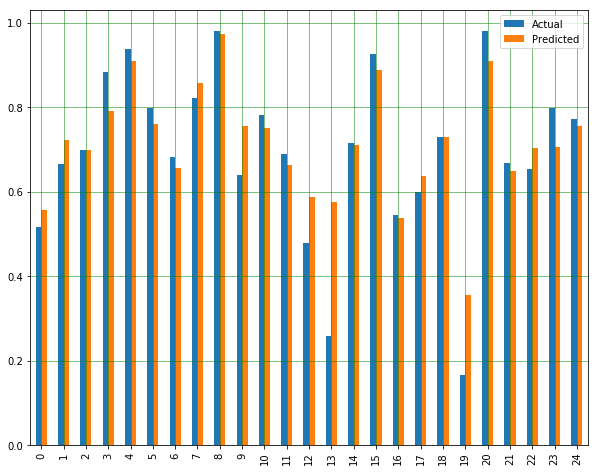

In [19]:
comparison_df.iloc[0:25].plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Text(0, 0.5, 'Predicted')

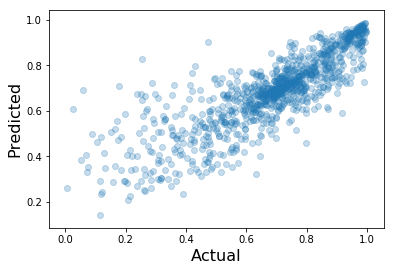

In [20]:
plt.scatter(comparison_df.iloc[0:1000]["Actual"], comparison_df.iloc[0:1000]["Predicted"], alpha = .25)
plt.xlabel("Actual", fontsize = 16) #scatter plot of specialty combined data
plt.ylabel("Predicted",  fontsize = 16)

Statistics

In [21]:
print("r Squared:", metrics.r2_score(y_test, y_pred))
rsq = metrics.r2_score(y_test, y_pred)

r Squared: 0.681780802691228


In [22]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
mse = metrics.mean_squared_error(y_test, y_pred)

Mean Absolute Error: 0.07894604796889222
Mean Squared Error: 0.013033911084408338


In [23]:
metrics_df = pd.read_csv("data\metrics_df.csv")

In [24]:
metrics_df = metrics_df.append({"Input": Labels, "R Squared": rsq, "Mean Absolute Error": mae, "Mean Squared Error": mse, "Model": "Random Forest"}, ignore_index=True)

In [41]:
metrics_df.tail()

,Input,R Squared,Mean Absolute Error,Mean Squared Error,Model
24,"['specialty_description', 'nppes_provider_city...",0.684378,0.076955,0.012896,Random Forest
25,"['specialty_description', 'nppes_provider_city...",0.688137,0.076948,0.012803,Random Forest
26,"['specialty_description', 'nppes_provider_city...",0.688083,0.076709,0.012777,Random Forest
27,"['specialty_description', 'nppes_provider_city...",0.674364,0.079523,0.013374,Random Forest
28,"[specialty_description, nppes_provider_city, t...",0.681781,0.078946,0.013034,Random Forest


In [38]:
metrics_df.to_csv("data\metrics_df.csv", index = False)

Save the Trained Model

In [45]:
dump(regressor, "Model_Weights\RFR\RFR_trainedModel") 

['Model_Weights\\RFR\\RFR_trainedModel']